# K-Means Clustering 

## Learning Objectives
- Understand how to determine the optimal number of clusters using WCSS
- Implement K-Means clustering with scikit-learn
- Evaluate clustering results by comparing with known labels
- Interpret the meaning of clustering parameters

## Key Concepts
- **WCSS (Within-Cluster Sum of Squares)**: Measures the tightness of clusters
- **Elbow Method**: Find the "elbow" point where WCSS reduction slows
- **k-means++**: Smart initialization method for better convergence
- **n_init**: Number of times to run the algorithm with different initializations

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

## Load the Data
Data contains three different types of wheat kernels (Kama, Rosa and Canadian). There are 70 datapoints for each type.

In [7]:
# Load the training dataset
data = pd.read_csv('./seeds.csv')

print(f"Shape of data: {data.shape}")
data.sample(10)

Shape of data: (210, 8)


,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,species
117,19.15,16.45,0.8890,6.245,3.815,3.084,6.185,1
55,15.03,14.77,0.8658,5.702,3.212,1.933,5.439,0
120,20.24,16.91,0.8897,6.315,3.962,5.901,6.188,1
46,15.36,14.76,0.8861,5.701,3.393,1.367,5.132,0
169,11.24,13.00,0.8359,5.090,2.715,3.521,5.088,2
12,13.89,14.02,0.8880,5.439,3.199,3.986,4.738,0
105,18.83,16.29,0.8917,6.037,3.786,2.553,5.879,1
190,10.93,12.80,0.8390,5.046,2.717,5.398,5.045,2
139,16.23,15.18,0.8850,5.872,3.472,3.769,5.922,1
201,12.67,13.32,0.8977,4.984,3.135,2.300,4.745,2


## Prepare Features

In [8]:
# Display only features (first 6 columns)
features = data[data.columns[0:6]]
features.sample(10)

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient
66,14.34,14.37,0.8726,5.630,3.190,1.3130
173,11.40,13.08,0.8375,5.136,2.763,5.5880
21,14.11,14.26,0.8722,5.520,3.168,2.6880
30,13.16,13.82,0.8662,5.454,2.975,0.8551
109,18.55,16.22,0.8865,6.153,3.674,1.7380
189,10.59,12.41,0.8648,4.899,2.787,4.9750
76,17.32,15.91,0.8599,6.064,3.403,3.8240
32,14.09,14.41,0.8529,5.717,3.186,3.9200
165,12.10,13.15,0.8793,5.105,2.941,2.2010
25,16.19,15.16,0.8849,5.833,3.421,0.9030


## Reduce Dimensions with PCA
We'll use PCA to reduce 6 dimensions to 2 for visualization

In [13]:
# Normalize the features
scaled_features = MinMaxScaler().fit_transform(data[data.columns[0:6]])
# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998]])

## Visualize the Data

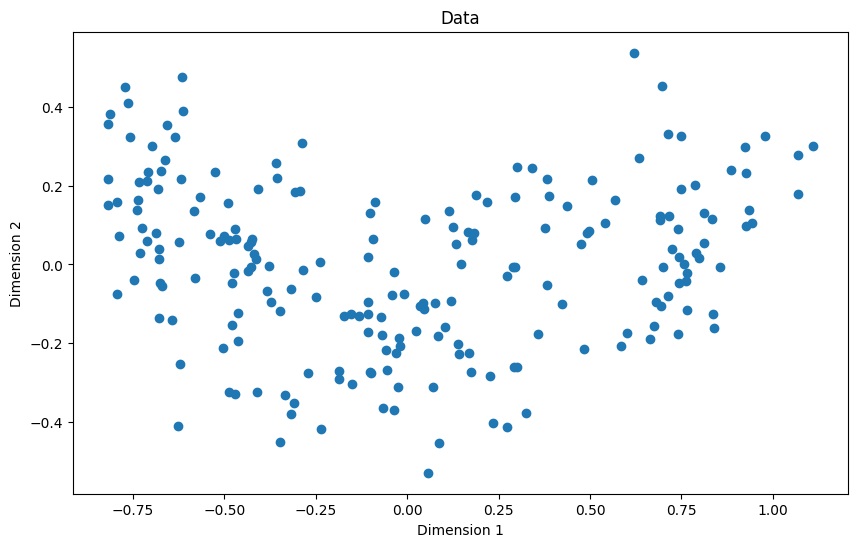

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(features_2d[:,0], features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

---
# Exercise 1: Using the Elbow Method to Find Optimal Clusters

## Question 1.1
**What does WCSS (Within-Cluster Sum of Squares) measure?**

WCSS measures the sum of the squared distances between each data point and the centroid of its assigned cluster. It essentially quantifies how "tight" or compact the clusters are; a lower WCSS indicates that data points are closer to their cluster centers.

## Question 1.2
**Why does WCSS decrease as the number of clusters increases?**

As the number of clusters increases, there are more centroids available to represent the data. This naturally reduces the distance between any given point and its nearest centroid. In the extreme case where the number of clusters equals the number of data points, the WCSS would be zero because every point would be its own centroid.

## Question 1.3
**What is the "elbow method" and why is it useful?**

The "elbow method" is a technique used to determine the optimal number of clusters ($k$). By plotting WCSS against the number of clusters, we look for an "elbow" point where the rate of decrease in WCSS slows down significantly. It is useful because it helps find a balance between minimizing WCSS (better fit) and keeping the number of clusters low (better interpretability and less overfitting).



In [15]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(features_2d)
    wcss.append(kmeans.inertia_)

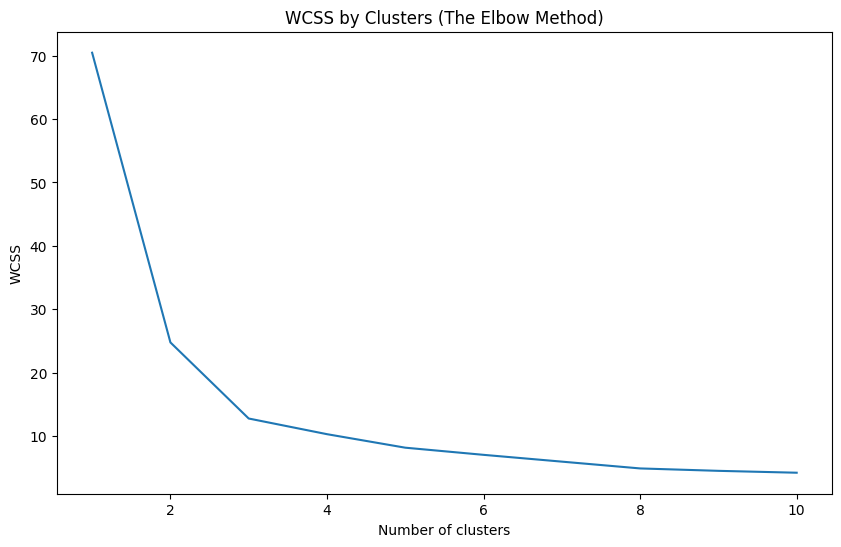

In [16]:
# Plot the WCSS values
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss)
plt.title('WCSS by Clusters (The Elbow Method)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Question 1.4
**Looking at the plot above, how many clusters would you choose and why?**

I would choose 3 clusters. The Elbow Point: The plot shows a sharp decrease in WCSS as we go from 1 to 3 clusters. After 3 clusters, the curve flattens out, and the rate of improvement (decrease in WCSS) slows down significantly. This "bend" or "elbow" at $k=3$ suggests it is the optimal trade-off point.

---
# Exercise 2: Create and Fit K-Means Model

## Question 2.1
**What does the `init='k-means++'` parameter do?**

init='k-means++' is a smart initialization method for K-Means. Instead of selecting initial centroids completely randomly (which can lead to poor results), it selects the first centroid randomly and then chooses subsequent centroids based on a probability proportional to their squared distance from the closest existing centroid. This ensures the initial centroids are well spread out, leading to faster convergence and better final results.


## Question 2.2
**Why do we set `n_init` to 100? What would happen if we set it to 1?**

Setting it to 100 increases the probability of finding the global optimum (the best possible clustering) rather than getting stuck in a local optimum. If we set it to 1, we would only run the algorithm once, which might not find the best clustering configuration.
## Question 2.3
**What does `max_iter` control? What happens if it's too small?**

max_iter specifies the maximum number of iterations the algorithm will perform for a single run (a single initialization) to try and converge (i.e., until centroids stop moving). 
- If too small: The algorithm might stop "early" before the clusters have fully stabilized or converged, resulting in inaccurate cluster assignments.

In [19]:

model = KMeans(
    n_clusters=3,        # Number of clusters (based on elbow method)
    init='k-means++',    # Use 'k-means++' for smart initialization
    n_init=100,          # Number of times to run with different initializations (try 100)
    max_iter=1000        # Maximum iterations for a single run (try 1000)
)

km_clusters = model.fit_predict(features_2d)

km_clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

## Visualize K-Means Clusters

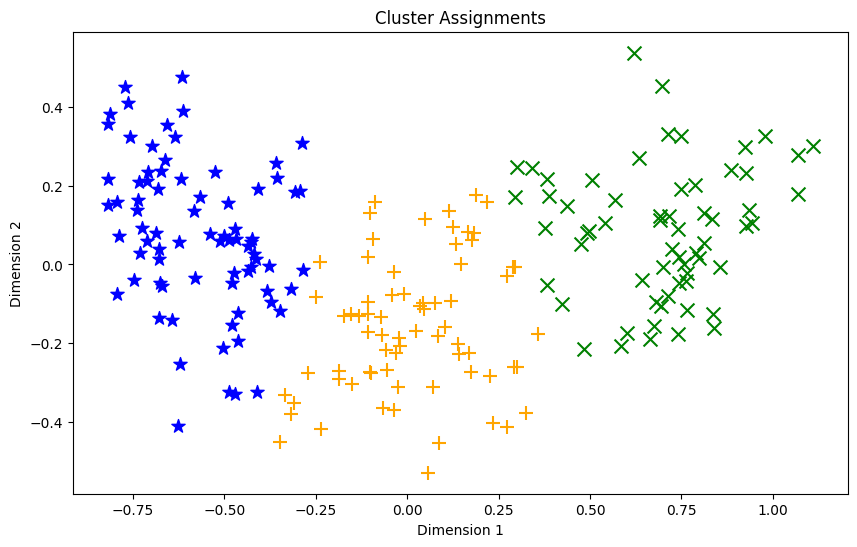

In [20]:
# Helper function to plot clusters
def plot_clusters(samples, clusters):
    col_dic = {0:'blue', 1:'green', 2:'orange'}
    mrk_dic = {0:'*', 1:'x', 2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    plt.figure(figsize=(10,6))
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], 
                   color=colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Cluster Assignments')
    plt.show()

# Plot the K-Means clusters
plot_clusters(features_2d, km_clusters)

---
# Exercise 3: Compare with Actual Labels

## Question 3.1
**How well do the K-Means clusters match the actual species?**

The K-Means clusters match the actual species quite well. The algorithm successfully identified three distinct groups that largely correspond to the three wheat varieties . The general structure and separation of the data points in the K-Means plot look very similar to the plot of the actual labels.


## Question 3.2
**Are there any misclassified seeds? Where are they located on the plot?**

Yes, there are likely some misclassified seeds. These are primarily located at the boundaries where the clusters meet or overlap. In the plots, you can see these as points in the "border regions" between groups (particularly between the blue and orange clusters) that are assigned to one cluster by K-Means but belong to a different species in the actual data.


## Question 3.3
**What factors might cause clustering algorithms to group seeds differently than their true species?**
1. Overlapping Features: The physical characteristics (like area or perimeter) of different species might be very similar, creating a "gray area" where data points overlap in the feature space.
2. Cluster Shape Assumption: K-Means assumes clusters are spherical and roughly the same size. If the true biological groups have irregular shapes or different densities, K-Means might draw the boundaries incorrectly.

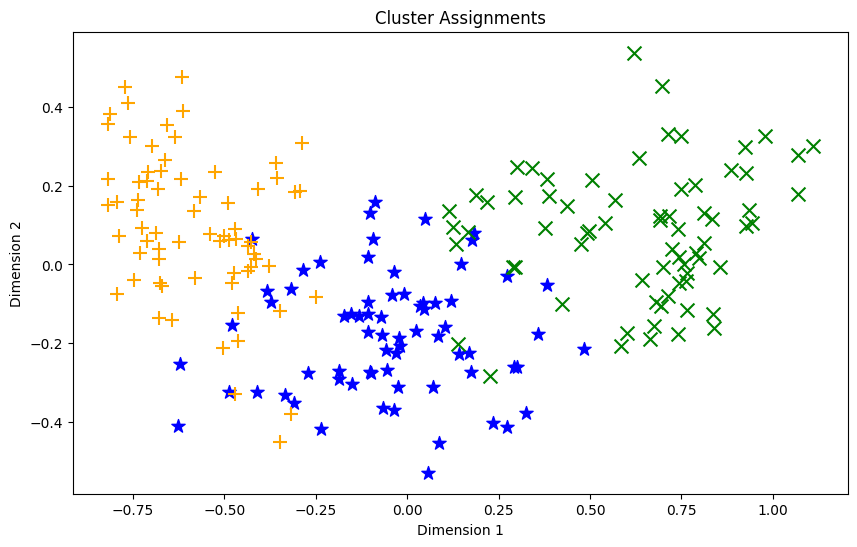

In [23]:
# The species are encoded as: 0 (Kama), 1 (Rosa), 2 (Canadian)
seed_species = data['species']

# Plot the actual species labels
plot_clusters(features_2d, seed_species.values)

## Side-by-side Comparison

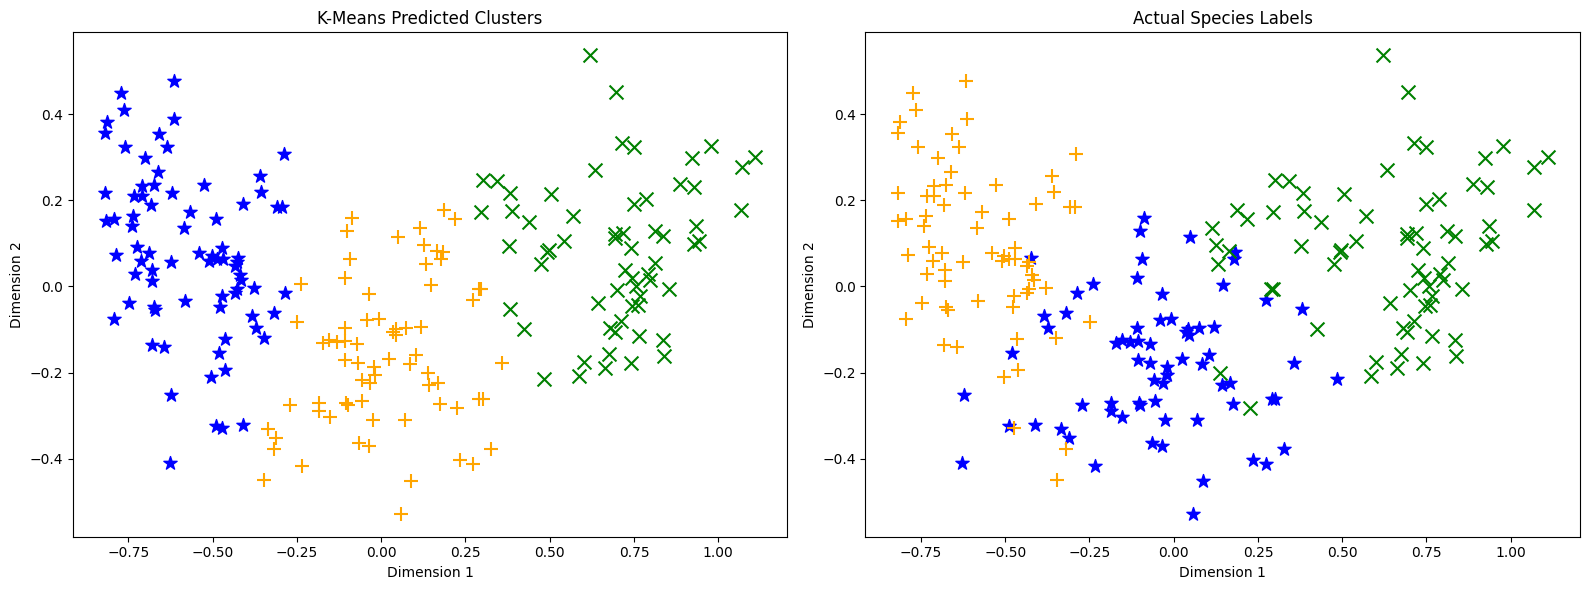

In [24]:
# Create side-by-side plots for comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot K-Means clusters
col_dic = {0:'blue', 1:'green', 2:'orange'}
mrk_dic = {0:'*', 1:'x', 2:'+'}

for i in range(len(km_clusters)):
    ax1.scatter(features_2d[i][0], features_2d[i][1], 
               color=col_dic[km_clusters[i]], marker=mrk_dic[km_clusters[i]], s=100)
ax1.set_xlabel('Dimension 1')
ax1.set_ylabel('Dimension 2')
ax1.set_title('K-Means Predicted Clusters')

# Plot actual species
for i in range(len(seed_species)):
    ax2.scatter(features_2d[i][0], features_2d[i][1], 
               color=col_dic[seed_species.values[i]], marker=mrk_dic[seed_species.values[i]], s=100)
ax2.set_xlabel('Dimension 1')
ax2.set_ylabel('Dimension 2')
ax2.set_title('Actual Species Labels')

plt.tight_layout()
plt.show()

---
# Bonus Challenge: Parameter Experimentation

Try modifying the K-Means parameters and observe how they affect the results:

1. **Change `n_clusters`** to 2 or 4 - how do the results differ?
2. **Reduce `n_init`** to 10 - does it affect consistency?
3. **Try different initialization** methods (e.g., `init='random'`)
4. **Experiment with `max_iter`** - what happens if it's too small (e.g., 10)?

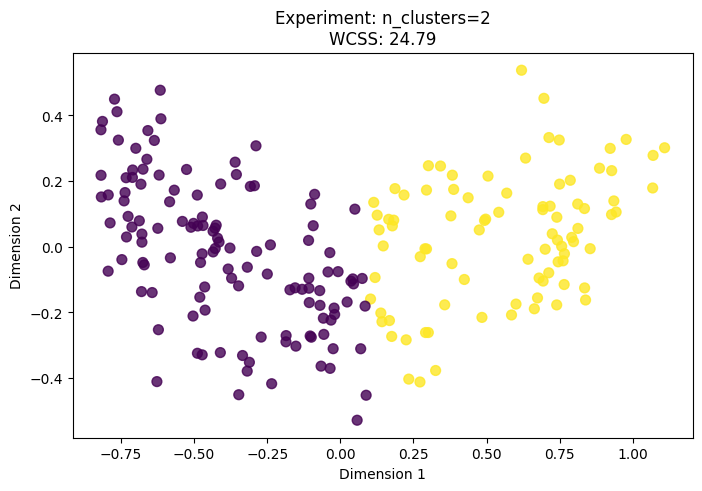

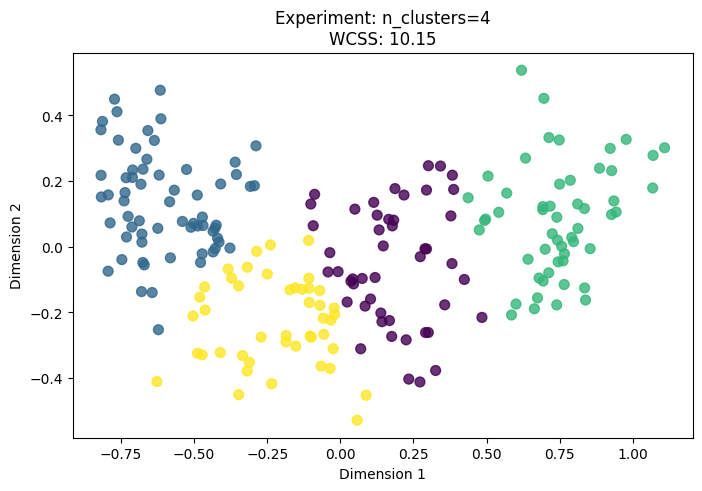

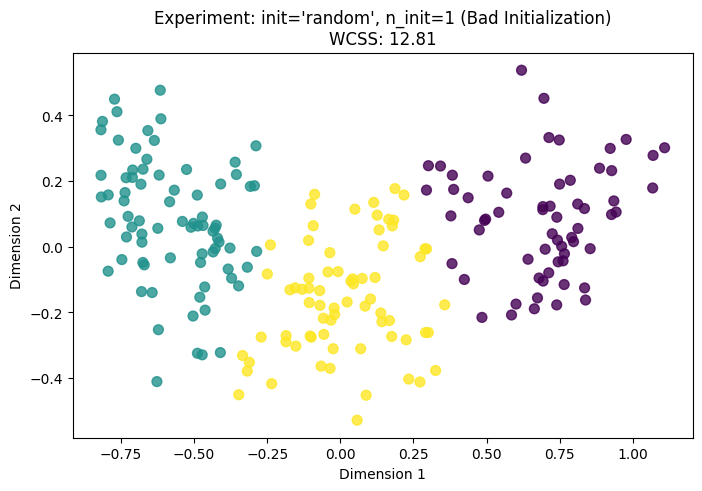

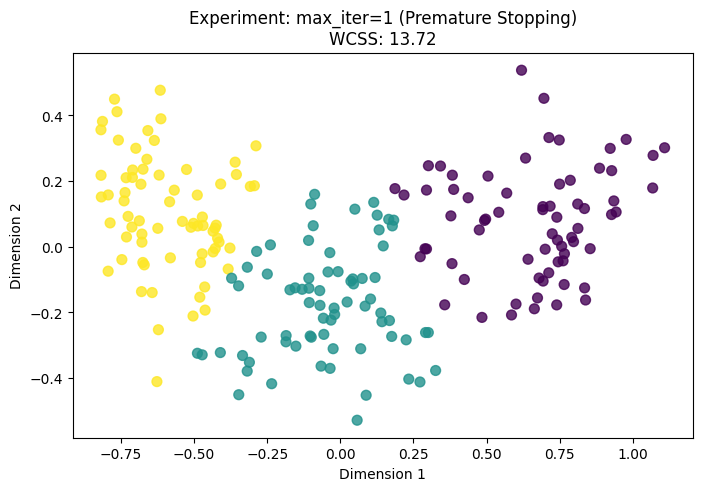

In [28]:
# Robust plotting function for experiments (handles any number of clusters)
def plot_experiment(title, model, data):
    clusters = model.fit_predict(data)
    plt.figure(figsize=(8, 5))
    # Use a colormap (cmap) to automatically handle different numbers of clusters
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.8)
    plt.title(f"{title}\nWCSS: {model.inertia_:.2f}")
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()

plot_experiment("Experiment: n_clusters=2", 
                KMeans(n_clusters=2, init='k-means++', n_init=100),features_2d)

plot_experiment("Experiment: n_clusters=4", 
                KMeans(n_clusters=4, init='k-means++', n_init=100), features_2d)

plot_experiment("Experiment: init='random', n_init=1 (Bad Initialization)", 
                KMeans(n_clusters=3, init='random', n_init=1, random_state=1), features_2d)

plot_experiment("Experiment: max_iter=1 (Premature Stopping)", 
                KMeans(n_clusters=3, init='random', n_init=1, max_iter=1, random_state=42), features_2d)

---
# Reference: Hierarchical Clustering (Pre-completed)

Below is an example of hierarchical clustering for comparison. This code is already complete.

In [29]:
# Hierarchical Clustering (reference implementation)
agg_model = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_model.fit_predict(features.values)
agg_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2])

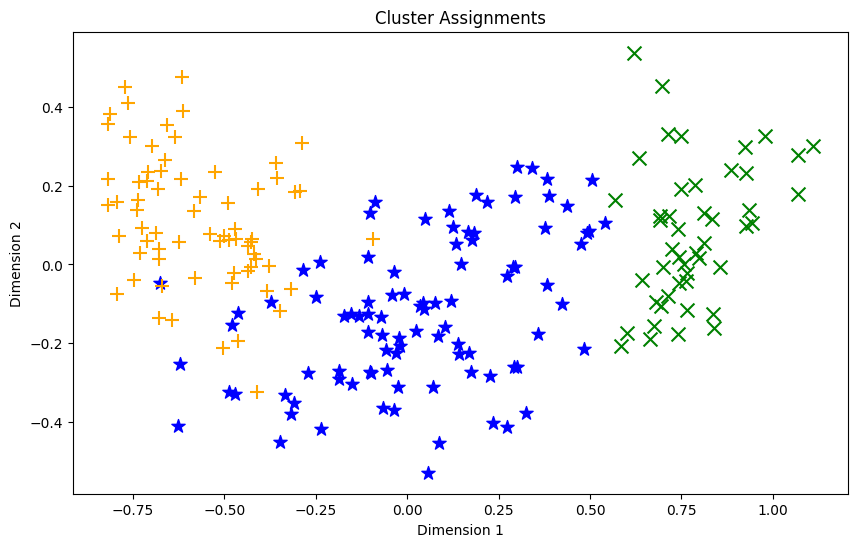

In [30]:
# Visualize hierarchical clustering results
plot_clusters(features_2d, agg_clusters)

---
# Reflection Questions

## Question R1
**When would you use K-Means clustering in a real-world scenario? Give at least two examples.**

1. Customer Segmentation: Businesses use K-Means to group customers based on purchasing history, age, or income. This allows them to target specific groups with tailored marketing campaigns (e.g., "high spenders" vs. "bargain hunters").
2. Image Compression: K-Means can reduce the file size of an image by clustering the thousands of colors in the image into a smaller set (e.g., 64 colors) and replacing each pixel's color with the nearest cluster centroid.

## Question R2
**What are the limitations of K-Means clustering? List at least three.**

1. Manual Selection of K: You must define the number of clusters ($k$) beforehand. If you pick the wrong number, the results can be meaningless.
2. Sensitivity to Outliers: K-Means uses the mean (average) to find centroids. A single outlier can pull the centroid away from the true center, distorting the cluster.
3. Spherical Assumption: K-Means assumes clusters are spherical and of similar size. It struggles to identify clusters that are elongated, irregular, or have varying densities.
## Question R3
**How does K-Means compare to hierarchical clustering for this dataset? What are the pros and cons of each?**

- Comparison: For this specific dataset, both algorithms likely produce very similar results because the clusters are relatively distinct and globular.
- K-Means:
    - Pros: Much faster and computationally efficient, making it better for large datasets.
    - Cons: Requires choosing $k$ in advance; results can vary based on initialization.
- Hierarchical:
    - Pros: Does not require choosing $k$ upfront (you can cut the dendrogram where you want); deterministic (always gives the same result).
    - Cons: Very slow on large datasets ($O(n^3)$ or $O(n^2)$ complexity); sensitive to noise.
## Question R4
**Why is it important to normalize/scale features before applying K-Means clustering?**

K-Means calculates clusters based on distance (usually Euclidean distance). If one feature has a large range (e.g., "Salary" in thousands) and another has a small range (e.g., "Age" in tens), the distance calculation will be completely dominated by the larger feature. Normalizing ensures that all features contribute equally to the clustering process.

